# Seminar 2

This document contains some simple examples on data analysis and plotting.
Let's load some example data from http://www.nhao.jp/~sbaar/seminar/jdata4_err0.txt

In [1]:
import numpy as np
from matplotlib import pyplot as plt

We could use the standard python function "open" as follows:

In [2]:
f = open("jdata4_err0.txt","r") 
for i in f:    ### Loop to print the contents of the file "jdata4_err0.txt" line by line.
    print i
    break     ### Stops the loop after the first iteration

57100.50893 	0.999185452	0



In [3]:
List = []
for i in f:
    List.append(i)


In [4]:
List[0][0:11]  ### and so on ... let's not waste anymore time on parsing data

'57100.50968'

In [5]:
float(List[0][0:11])*3 

171301.52904

However, this can take a few lines and numpy offers a shorter version to dump the contents of a text file into a numerical array (genfromtxt).

In [6]:
data = np.genfromtxt("jdata4_err0.txt")

In [7]:
print data[0:4]  ### prints the first four lines of the array.

[[  5.71005089e+04   9.99185452e-01   0.00000000e+00]
 [  5.71005097e+04   1.00395611e+00   0.00000000e+00]
 [  5.71005105e+04   1.00797512e+00   0.00000000e+00]
 [  5.71005112e+04   1.00103647e+00   0.00000000e+00]]


Let's plot the data assuming the first column represents the horizontal axis and the second column represents the vertical axis.

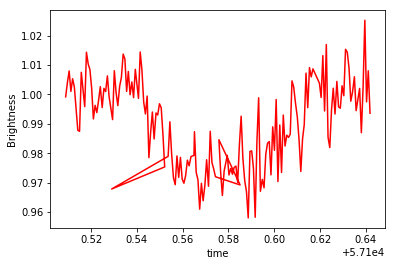

In [8]:
#plt.figure(figsize = (10,5))
plt.plot(data[:,0], data[:,1], "-r") ## last argument defines the line style
plt.xlabel("time")
plt.ylabel("Brightness")
plt.show()

In the plot, at least two points appear to be out of order. We can see the two points better plotting the time column over it's idices.

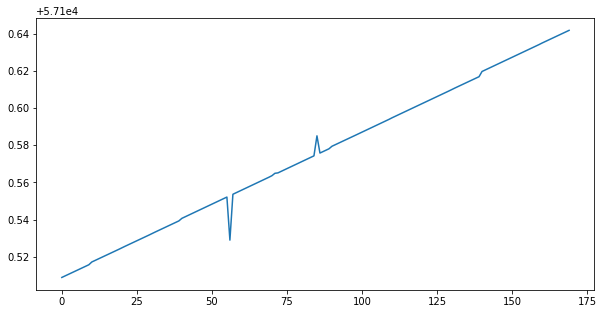

In [9]:
plt.figure(figsize = (10,5))
plt.plot(data[:,0])
plt.show()

We can produce a filter that will resolv the indices of the two miss aligned points.

## usefull numpy functions

The next example shows how to plot a simple sinus function. Also some array properties are demonstrated.

In [10]:
beginn = -2.*np.pi
endd  = 2.*np.pi
x = np.linspace(beginn,endd,20)
y = np.sin(x)

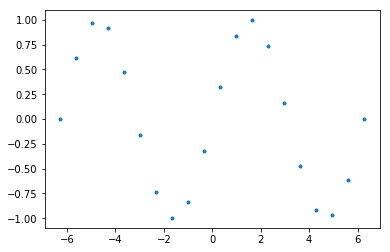

In [11]:
plt.plot(x,y,".")
plt.show()

In [12]:
y.mean()

8.7673604224790549e-17

In [13]:
y.max()

0.99658449300666996

In [14]:
y.min()

-0.99658449300666985

In [15]:
y.std()

0.68920243760451116

## Soring numpy arrays

In [16]:
a = np.array([34,1,213,12,321,13])
b = np.arange(6)
print a
print b

[ 34   1 213  12 321  13]
[0 1 2 3 4 5]


In [17]:
print np.sort(a)

[  1  12  13  34 213 321]


In [18]:
print np.argsort(a)

[1 3 5 0 2 4]


While sort() sorts the array directly from smallest to largest element, argsort() returnes the indices representing the sorted array. This means argsort() returns a method on how to sort a specific array, which can be applied to any array with the same shape.

In [19]:
print a[np.argsort(a)]

[  1  12  13  34 213 321]


In [20]:
print b[np.argsort(a)]

[1 3 5 0 2 4]


In [21]:
textA = np.array(["cat","dog","snake","miau","rabit","pig"])
print textA[np.argsort(a)]

['dog' 'miau' 'pig' 'cat' 'snake' 'rabit']


Following, the example data from above is sorted.

In [22]:
dataX, dataY = data[:,0], data[:,1]

In [23]:
print data.shape, dataX.shape, dataY.shape

(170, 3) (170,) (170,)


In [24]:
Xsort = np.sort(dataX)             ### or dataX[np.argsort[dataX]]
Ysort = dataY[np.argsort(dataX)]   ### the elements of dataY are aranged in the same way dataX has been sorted.

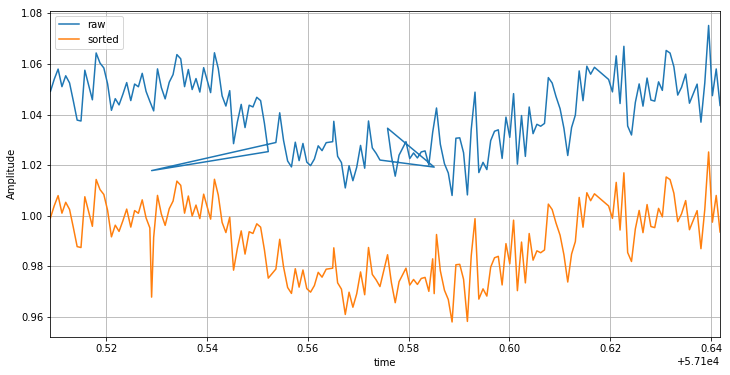

In [25]:
plt.figure(figsize = (12,6))
plt.plot(dataX,dataY+0.05, label = "raw")  ### dataY is offset by 0.05 
plt.plot(Xsort,Ysort, label = "sorted")
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.grid()
plt.xlim([Xsort.min(),Xsort.max()])
plt.legend()
plt.show()

Generating Data with Numpy

In [26]:
print np.zeros(5)
print np.ones((5))

[ 0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.]


In [27]:
print np.zeros((5,5))

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [28]:
print np.random.rand(5)

[ 0.40568099  0.72051404  0.37006275  0.95603293  0.63625136]


Let's create some 2D noise

In [29]:
R = np.random.rand(50,50)

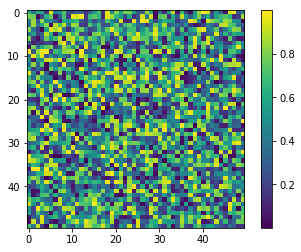

In [30]:
plt.imshow(R)
plt.colorbar()
plt.show()

3D trigonometric funcions

I the following example, we create a 2D grid on which we spawn a 3D function. Meshgrid() creates a 2D grid for each direction (x and y).

In [31]:
B = 0.
E = 2.*np.pi

X = np.linspace(B,E,500)
Y = np.linspace(B,E,500)
XX, YY = np.meshgrid(X,Y)

Z = np.sin(XX)+np.cos(YY)

In [32]:
print X.shape   ### 1D
print XX.shape  ### 2D

(500,)
(500, 500)


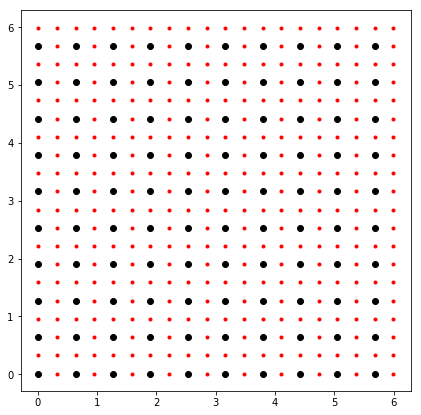

In [33]:
fig = plt.figure(figsize = (7,7))
plt.plot(XX[1::25,1::25],YY[1::25,1::25],"r.") ### plots every 25th grid point of XX
plt.plot(XX[1::50,1::50],YY[1::50,1::50],"ko") ### plots every 50th grid point of XX
plt.show()

We can use the subplot function to display the arrays XX and YY, that span the grid side by side.

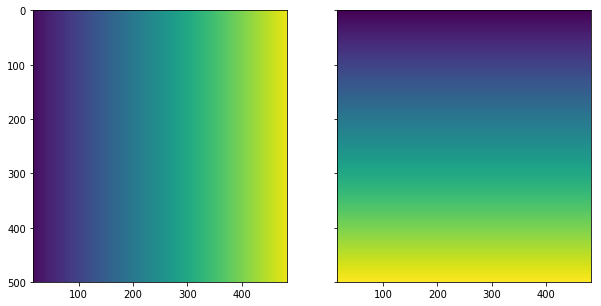

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (10,5))
ax1.imshow(XX)
ax2.imshow(YY)
plt.show()

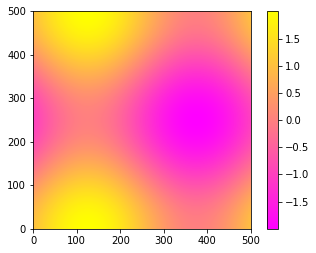

In [35]:
plt.imshow(Z,cmap = "spring", origin='lower')
plt.colorbar()
plt.show()

Let's determine the Minimum and it's position in the computed FOV.

In [36]:
print Z.min()                  ### Minimum Value
print np.argmin(Z, axis=0)[0]  ### Minimum Y position
print np.argmin(Z, axis=1)[0]  ### Minimum X position

-1.99997522707
249
374


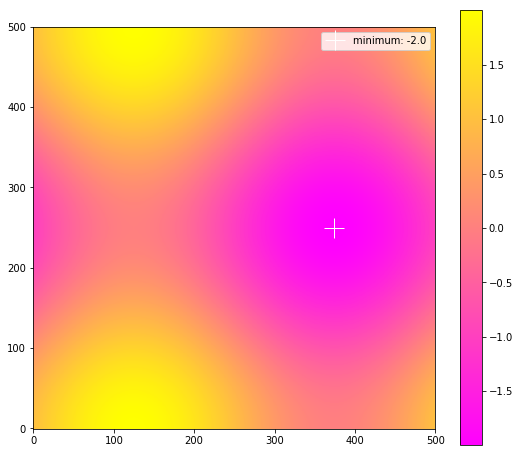

In [37]:
Fig = plt.figure(figsize = (9,8))
plt.imshow(Z,cmap = "spring", origin = "lower")
plt.plot([np.argmin(Z, axis=1)[0]],
         [np.argmin(Z, axis=0)[0]], 
         "w+", markersize = 20,
         label = "minimum: "+str(round(Z.min())  )    )
plt.colorbar()
plt.legend()
plt.show()

Let's convolve the amplitude Z with some noise.

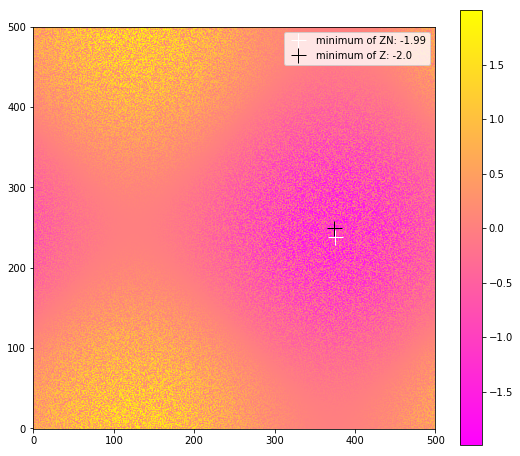

In [38]:
ZN = Z * np.random.rand(Z.shape[1],Z.shape[0])
Fig = plt.figure(figsize = (9,8))
plt.imshow(ZN,cmap = "spring", origin = "lower")
plt.plot([np.argmin(ZN, axis=1)[0]],
         [np.argmin(ZN, axis=0)[0]], 
         "w+", markersize = 15,
         label = "minimum of ZN: "+str(round(ZN.min(),2)  )    )
plt.plot([np.argmin(Z, axis=1)[0]],
         [np.argmin(Z, axis=0)[0]], 
         "k+", markersize = 15,
         label = "minimum of Z: "+str(round(Z.min(),2)  )    )
plt.colorbar()
plt.legend()
plt.show()